In [20]:
import urllib.request
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import math

%matplotlib inline

data_download=False
### set this to True if running for the first time
if data_download:
    urllib.request.urlretrieve("http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical_subset.nc", 
                           "tropical_subset.nc")

In [21]:
def doReyn(Array):
    Bar = Array.mean(axis=2).mean(axis=1)
    Pert = Array-Bar[:,np.newaxis,np.newaxis]
    return (Bar,Pert)

Define varriables

In [31]:
with Dataset('tropical_subset.nc','r') as nc_in:
    print(list(nc_in.variables.keys()))
    #
    # remove the time dimension since we only have one timestep
    #   
    
    Rd=287  #dry air gas constant  J/kg/K
    cp=1004.  #dry air heat capacity at constant pressure (J/kg/K)
    p0=1.e5 
    g=9.8
    k=0.4
    Z=nc_in.variables['z'][...]
    X=nc_in.variables['x'][...]
    Y=nc_in.variables['y'][...]
    pres=nc_in.variables['p'][...]  
    pres=pres*100.  #convert to Pa
    T=nc_in.variables['TABS'][0,...]
    W=nc_in.variables['W'][0,...]  #m/s
    U=nc_in.variables['U'][0,...]  #m/s
    V=nc_in.variables['V'][0,...]  #m/s  
    qv=nc_in.variables['QV'][0,...]  #g/kg
    qv = qv/1000
    qn=nc_in.variables['QN'][0,...]  #g/kg
    qn = qn/1000
 
#   
#   Theta & Theta_v
#    
    Theta = T*(p0/pres[:,np.newaxis,np.newaxis])**(Rd/cp)
    Tv = Theta*(1+0.61*qv-qn)
#
#   Primes
#

    W_bar,Wpert = doReyn(W)
    U_bar,Upert = doReyn(U)
    V_bar,Vpert = doReyn(V)
    Th_bar,Th_pert = doReyn(Theta)
    Tv_bar,Tvpert = doReyn(T_v)
    #P_prime=pres-P_bar

['x', 'y', 'z', 'time', 'p', 'U', 'V', 'W', 'PP', 'TABS', 'QV', 'QN', 'QP']


## Calculate zi ~ 425 m
  #### Based off the assumpion the top of the ml is where the theta begins to increase with height

425.0


 (0, 10000),

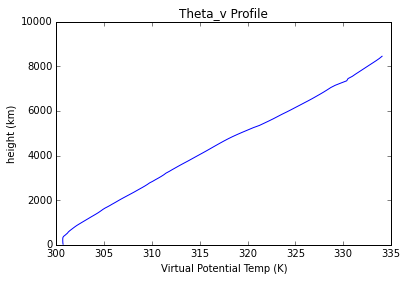

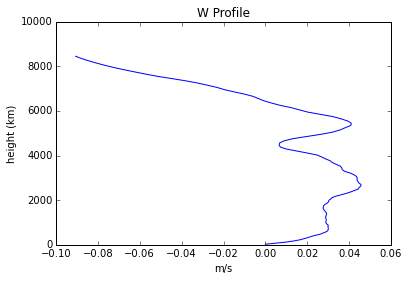

In [43]:
W_Tv_pro=(W_bar*Tv_bar)
x=0
y=0
while x == 0:
    if Tv_bar[y]+0.1 < Tv_bar[y+1]:
        x = y+1     
    y = y+1
print (Z[x])
zi_lev = x
pl = plt.figure(1)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(Tv_bar,Z)
ax1.set(xlabel='Virtual Potential Temp (K)',ylabel='height (km)',title = 'Theta_v Profile',ylim=(0,10000))

pl = plt.figure(2)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(W_bar,Z)
ax1.set(xlabel='m/s',ylabel='height (km)',title = 'W Profile',ylim=(0,10000))

# Calculate, tke, w*, u*,& L varriables
    ### I used z = 1 for the surface since w at z = 0 is zero and this causes errors in the calculations

u* =  0.0716093545025
-6.44648526667


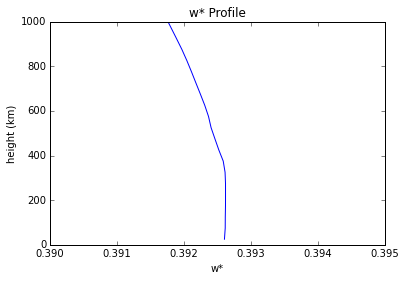

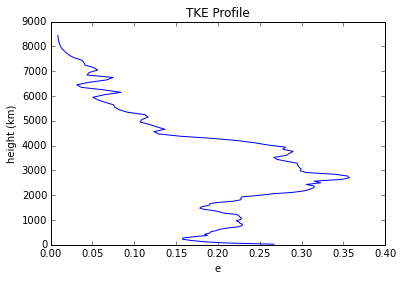

In [88]:
## w*
w_tv_s = (Wpert[1,:,:]*Tvpert[1,:,:]).mean()
w_star = g*Z[zi_lev]/Tv_bar*(w_tv_s)
temp = w_star
w_star = abs(w_star)**(1/3)
pl = plt.figure(1)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(w_star,Z)
ax1.set(xlabel='w*',ylabel='height (km)',title = 'w* Profile',ylim=(0,1000),xlim=(0.39,0.395))
##  u*
u_w_s = (Upert[1,:,:]*Wpert[1,:,:]).mean()
v_w_s = (Vpert[1,:,:]*Wpert[1,:,:]).mean()
u_star = (u_w_s**2+v_w_s**2)**.25
print ('u* = ', u_star)
##L
L = -u_star**3*(Tv_bar[1].mean())/(k*g*w_tv_s)
print (L)
##
e = ((Wpert**2).mean(axis=2).mean(axis=1)+(Upert**2).mean(axis=2).mean(axis=1)
     +(Vpert**2).mean(axis=2).mean(axis=1))
pl = plt.figure(2)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(e,Z)
ax1.set(xlabel='e',ylabel='height (km)',title = 'TKE Profile')

# Plots from Stull

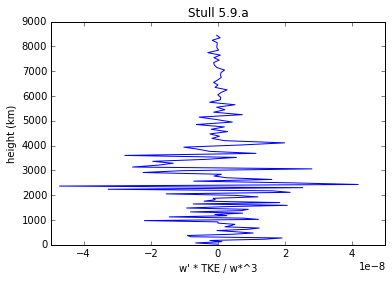

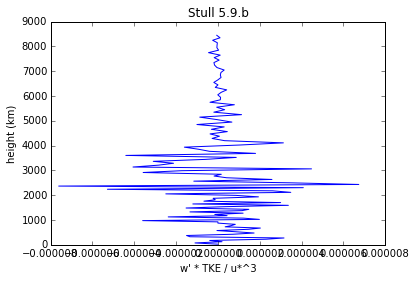

In [95]:
TKE = e[:,np.newaxis,np.newaxis]
W_TKE = (Wpert*TKE).mean(axis=2).mean(axis=1)
fig59a = W_TKE/(w_star**3)

pl = plt.figure(1)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(fig59a,Z)
ax1.set(xlabel="w' * TKE / w*^3",ylabel='height (km)',title = 'Stull 5.9.a')

fig59b = W_TKE/(u_star**3)
pl = plt.figure(2)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(fig59b,Z)
ax1.set(xlabel="w' * TKE / u*^3",ylabel='height (km)',title = 'Stull 5.9.b')

fig510a = 


#fig510a = (w_prime*(u_prime**2+v_prime**2)).mean(axis = 2).mean(axis = 1)/(2*wst**3)
#fig510b = (w_prime**3).mean(axis=2).mean(axis=1)/(2*wst**3)
#wpm = w_prime**3
#wpm = wpm.mean()
#fig510c = ((w_prime*(u_prime**2+v_prime**2)).mean(axis = 2).mean(axis = 1))/(wpm)
